# **Clustering**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta 
import winsound

In [54]:
import warnings

In [57]:
warnings.filterwarnings("ignore")

## **Datos**

In [93]:
df = pd.read_csv('Datos/marketing_campaign.csv', sep='\t')

In [94]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **Ingeniería de datos - People**

In [111]:
df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 
    'Recency']].sample(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency
171,1982,Graduation,Married,28718.0,1,0,13-07-2013,78
211,1954,Graduation,Together,77972.0,0,0,18-03-2014,18
1005,1954,Graduation,Single,36130.0,0,1,02-02-2013,46


#### **Edad**

In [95]:
df['Age'] = 2022 - df['Year_Birth']

#### **Educación y estado civil**

In [96]:
df = pd.merge(df.reset_index(), pd.get_dummies(df['Education']).reset_index(), on='index')
df = pd.merge(df, pd.get_dummies(df['Marital_Status']).reset_index(), on='index')

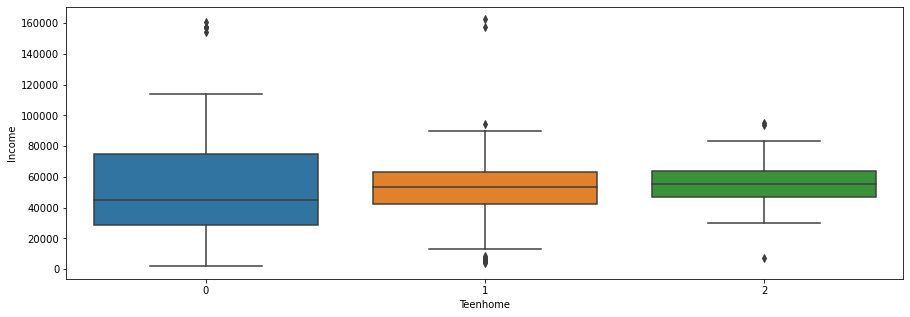

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(data=df.query('Income < 600000'), x='Teenhome', y='Income')
plt.show()

#### **Ingreso**

In [98]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

#### **Antiguedad**

In [99]:
df['Dt_Customer_Date'] = df['Dt_Customer'].apply(lambda x: pd.to_datetime(x))

In [100]:
df['Aniquity'] = pd.to_datetime(datetime.now()) - df[['Dt_Customer_Date']]

In [101]:
df['Aniquity_days'] = pd.to_numeric(df['Aniquity'].dt.days, downcast='integer')

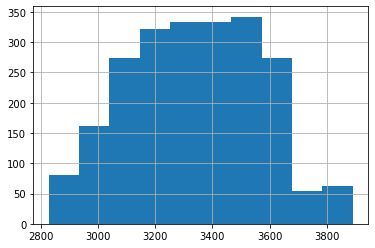

In [102]:
df['Aniquity_days'].hist()
plt.show()

### **Ingeniería de datos - Products**

In [113]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds']

In [148]:
df[products].sample(3)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1428,7,10,17,8,6,13
321,3,3,7,6,2,9
422,2,2,2,2,1,1


In [138]:
df['%Products'] = df['%MntWines'] + df['%MntFruits'] + df['%MntMeatProducts'] + df['%MntFishProducts'] + df['%MntSweetProducts'] + df['%MntGoldProds']  

In [112]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


### **Ingeniería de datos - Promotion**

In [145]:
df[['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
   'AcceptedCmp5', 'Response']].sample(3)

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
359,2,0,0,0,0,0,0
800,4,0,0,0,0,0,0
250,2,0,0,0,0,0,0


### **Ingeniería de datos - Place**

In [158]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sample()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1891,4,7,8,1
